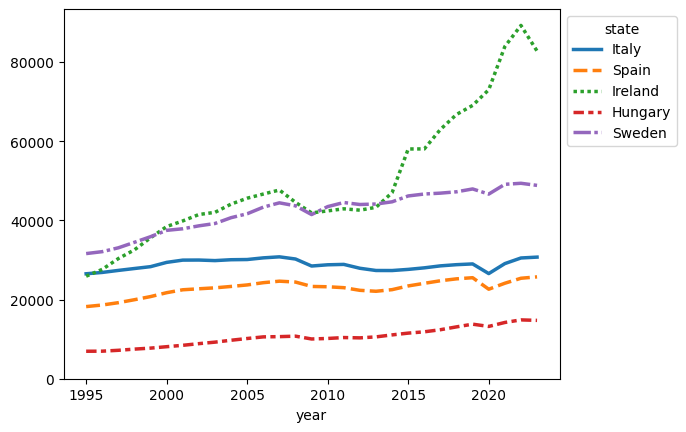

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

States = ['Italy', 'Spain', 'Ireland', 'Hungary', 'Sweden']
gdp_file = r'..\data\gdp_perCapita.csv'
df = pd.read_csv(gdp_file, sep=',', usecols=['geo', 'TIME_PERIOD', 'OBS_VALUE']).rename(columns={"geo":"state", "TIME_PERIOD": "year", "OBS_VALUE":"GDP" })
dfPivoted = df.pivot(index='year', columns='state', values='GDP')
lnPlot = sns.lineplot(data = dfPivoted[States], palette="tab10", linewidth= 2.5)
lnPlot.set_ylim(ymin=0)
sns.move_legend(obj=lnPlot, loc='upper right', bbox_to_anchor=(1.25, 1))

np.float64(2.3671792620723795)

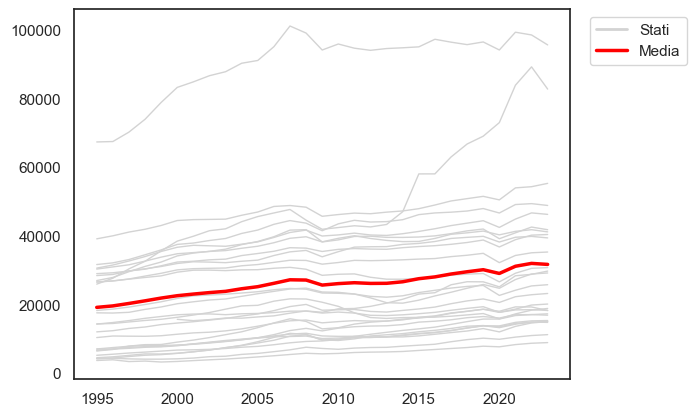

In [3]:
dfPctChange = dfPivoted.pct_change() * 100  

mean = dfPivoted.mean(axis=1)

sns.set_theme(style="white")
for state in dfPivoted.columns:
    sns.lineplot(x=dfPivoted.index, y=dfPivoted[state], color="lightgray" , linewidth=1, label=None)
sns.lineplot(data=mean, color="red", linewidth=2.5, label="Media")

plt.legend(handles=[
    plt.Line2D([0], [0], color='lightgray', lw=2, label='Stati'),
    plt.Line2D([0], [0], color='red', lw=2.5, label='Media')],
    loc='upper right', bbox_to_anchor=(1.25, 1))

plt.ylabel(None)
plt.xlabel(None)
dfPctChange.mean().mean()

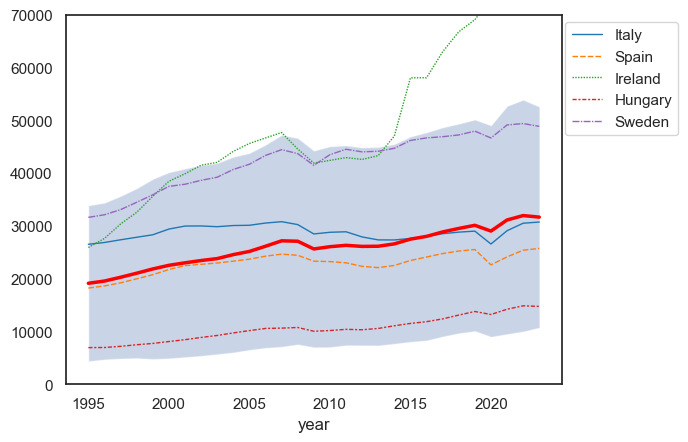

In [10]:
var = dfPivoted.var(axis=1)
dev_std = dfPivoted.std(axis=1)

dev_std

sns.lineplot(data = dfPivoted[States], palette="tab10", linewidth= 1)
lnPlot = sns.lineplot(data=mean, linewidth=2.5, color='red', hue_norm=(0, 100000))
lnPlot.set_ylim(ymin=0, ymax = 70000)
plt.fill_between(dfPivoted.index, mean - dev_std, 
                 mean + dev_std, alpha=0.3, label='Deviazione Standard')
sns.move_legend(obj=lnPlot, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()
